<a href="https://colab.research.google.com/github/tompoles/Portfolio/blob/project_3/Linear_gold_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored as cl
import pandas_datareader as pdr
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
!pip install yfinance
import yfinance as yf
import datetime as dt

     |████████████████████████████████| 5.5MB 6.6MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=1a3810c0931fb6d5ba9390193a84be27b111666c7c604574febf92f266a55f18
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [4]:
# aapl = pdr.DataReader("GC=F", 
#                        start='2015-1-1', 
#                        end='2015-12-31', 
#                        data_source='yahoo')['Adj Close']

In [61]:
# Ziskani dat pomoci pdr a Yahoo finance
futures = {'GC=F':'Gold'}
start = dt.datetime(2000, 8, 1)
end = dt.datetime(2021, 1, 10)

In [62]:
fut_df = pd.DataFrame()

for key, value in futures.items():
    print('downloading ', value)
    df = pdr.DataReader(key, 'yahoo', start)
    df['Futures'] = value
    fut_df = fut_df.append(df)

fut_df.to_pickle('futures_df.pickle')
fut_df

downloading  Gold


,High,Low,Open,Close,Volume,Adj Close,Futures
Date,,,,,,,
2000-08-30,273.899994,273.899994,273.899994,273.899994,0.0,273.899994,Gold
2000-08-31,278.299988,274.799988,274.799988,278.299988,0.0,278.299988,Gold
2000-09-01,277.000000,277.000000,277.000000,277.000000,0.0,277.000000,Gold
2000-09-05,275.799988,275.799988,275.799988,275.799988,2.0,275.799988,Gold
2000-09-06,274.200012,274.200012,274.200012,274.200012,0.0,274.200012,Gold
...,...,...,...,...,...,...,...
2021-01-04,1945.099976,1912.199951,1912.199951,1944.699951,154.0,1944.699951,Gold
2021-01-05,1952.699951,1941.300049,1941.699951,1952.699951,113.0,1952.699951,Gold
2021-01-06,1959.900024,1901.500000,1952.000000,1906.900024,331.0,1906.900024,Gold


In [63]:
Gold_df = fut_df[['Futures', 'Open', 'Adj Close']]
Gold_df.reset_index(level=0, inplace=True)
Gold_df

,Date,Futures,Open,Adj Close
0,2000-08-30,Gold,273.899994,273.899994
1,2000-08-31,Gold,274.799988,278.299988
2,2000-09-01,Gold,277.000000,277.000000
3,2000-09-05,Gold,275.799988,275.799988
4,2000-09-06,Gold,274.200012,274.200012
...,...,...,...,...
5070,2021-01-04,Gold,1912.199951,1944.699951
5071,2021-01-05,Gold,1941.699951,1952.699951
5072,2021-01-06,Gold,1952.000000,1906.900024
5073,2021-01-07,Gold,1922.599976,1912.300049


In [64]:
Gold_df['S_3'] = Gold_df['Adj Close'].rolling(window=3).mean()
Gold_df['S_9'] = Gold_df['Adj Close'].rolling(window=9).mean()
Gold_df['next_day_price'] = Gold_df['Adj Close'].shift(-1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


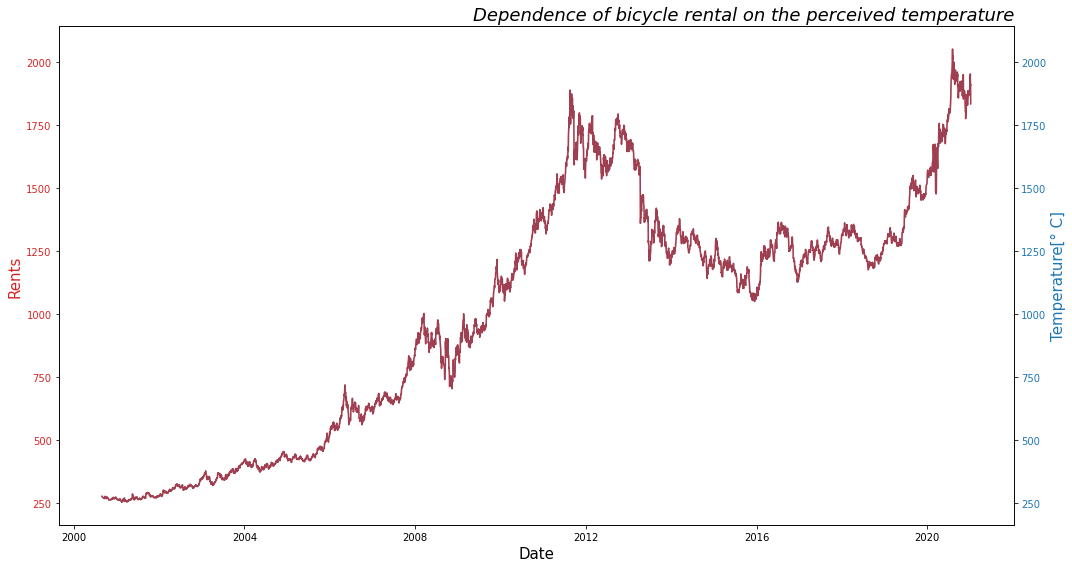

In [34]:
fig, ax1 = plt.subplots(figsize=(15,8))
x1 = Gold_df['Date']
x2 = Gold_df['Date']
y1 = Gold_df['Adj Close']
y2 = Gold_df['next_day_price']

plt.title('Dependence of bicycle rental on the perceived temperature', x=1, loc='right', fontstyle='italic', fontsize=18)
color = 'tab:red'
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Rents', color=color, fontsize=15)
ax1.plot(x2, y2, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_ylabel('Temperature[\u00b0 C]', color=color, fontsize=15) 
ax2.plot(x1, y1, color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color) 
fig.tight_layout() 
plt.show()

In [66]:
Gold_df=Gold_df.dropna()
Gold_df

,Date,Futures,Open,Adj Close,S_3,S_9,next_day_price
8,2000-09-12,Gold,272.899994,272.899994,273.099996,274.722219,272.799988
9,2000-09-13,Gold,272.799988,272.799988,272.933329,274.599996,272.399994
10,2000-09-14,Gold,272.399994,272.399994,272.699992,273.944441,272.299988
11,2000-09-15,Gold,272.299988,272.299988,272.499990,273.422217,271.399994
12,2000-09-18,Gold,271.399994,271.399994,272.033325,272.933329,271.899994
...,...,...,...,...,...,...,...
5069,2020-12-31,Gold,1897.000000,1893.099976,1887.933309,1881.599962,1944.699951
5070,2021-01-04,Gold,1912.199951,1944.699951,1909.599976,1887.988851,1952.699951
5071,2021-01-05,Gold,1941.699951,1952.699951,1930.166626,1895.433295,1906.900024
5072,2021-01-06,Gold,1952.000000,1906.900024,1934.766642,1898.511081,1912.300049


In [67]:
# Define dependent variable
y = Gold_df['next_day_price']
X = Gold_df[['S_3', 'S_9']]

In [68]:
# Split the data into train and test dataset
t = .8
t = int(t*len(Gold_df))

In [69]:
# Rozdeleni datasetu - 80% pro "natrenovani" a 20% pro predikci
# Train dataset
X_train = X[:t]
y_train = y[:t]

# Test dataset
X_test = X[t:]
y_test = y[t:]

In [70]:
# Create a linear regression model
linear = LinearRegression().fit(X_train, y_train)
print("Linear Regression model")
print("Gold ETF Price (y) = %.2f * 3 Days Moving Average (x1) \
+ %.2f * 9 Days Moving Average (x2) \
+ %.2f (constant)" % (linear.coef_[0], linear.coef_[1], linear.intercept_))

Linear Regression model
Gold ETF Price (y) = 1.20 * 3 Days Moving Average (x1) + -0.20 * 9 Days Moving Average (x2) + 0.99 (constant)


In [71]:
linear

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

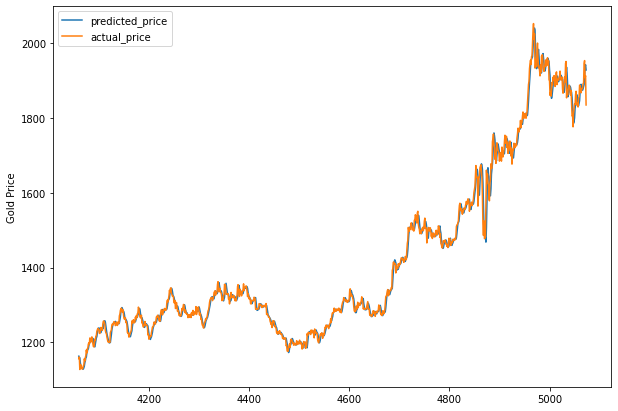

In [72]:
# Predicting the Gold ETF prices
predicted_price = linear.predict(X_test)
predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['price'])
predicted_price.plot(figsize=(10, 7))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold Price")
plt.show()

In [73]:
# R square
r2_score = linear.score(X[t:], y[t:])*100
float("{0:.2f}".format(r2_score))

99.39

In [103]:
gold = pd.DataFrame()

gold['Date'] = Gold_df['Date']
gold['price'] = Gold_df[t:]['Adj Close']
gold['predicted_price_next_day'] = predicted_price
gold['actual_price_next_day'] = y_test
gold['gold_returns'] = gold['price'].pct_change().shift(0) # procentualni zmena


In [106]:
gold.dropna()

,Date,price,predicted_price_next_day,actual_price_next_day,gold_returns
4061,2016-12-13,1156.699951,1158.436018,1161.300049,-0.005844
4062,2016-12-14,1161.300049,1159.319366,1127.800049,0.003977
4063,2016-12-15,1127.800049,1146.102888,1135.300049,-0.028847
4064,2016-12-16,1135.300049,1138.409786,1140.500000,0.006650
4065,2016-12-19,1140.500000,1130.699234,1131.500000,0.004580
...,...,...,...,...,...
5069,2020-12-31,1893.099976,1888.743146,1944.699951,0.001111
5070,2021-01-04,1944.699951,1913.441230,1952.699951,0.027257
5071,2021-01-05,1952.699951,1936.610093,1906.900024,0.004114
5072,2021-01-06,1906.900024,1941.510282,1912.300049,-0.023455


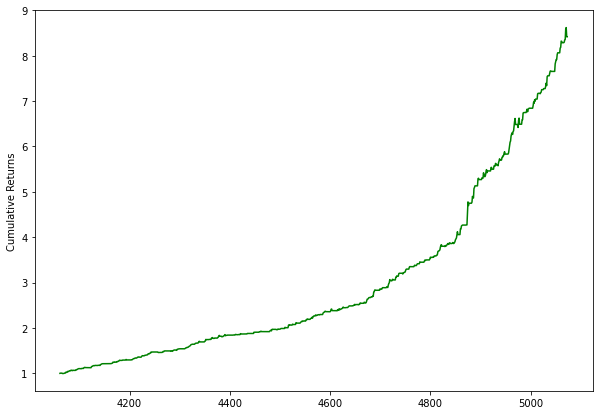

In [107]:
gold['signal'] = np.where(gold.predicted_price_next_day.shift(1) < gold.predicted_price_next_day,1,0)

gold['strategy_returns'] = gold.signal * gold['gold_returns']
((gold['strategy_returns']+1).cumprod()).plot(figsize=(10,7),color='g')
plt.ylabel('Cumulative Returns')
plt.show()

In [82]:
'Sharpe Ratio %.2f' % (gold['strategy_returns'].mean()/gold['strategy_returns'].std()*(252**0.5))

'Sharpe Ratio 1.28'

In [124]:
data = yf.download('GC=F', '2000-06-01', '2021-1-30', auto_adjust=True)
data['S_3'] = data['Close'].rolling(window=3).mean()
data['S_9'] = data['Close'].rolling(window=9).mean()
data = data.dropna()
data['predicted_gold_price'] = linear.predict(data[['S_3', 'S_9']])
data['signal'] = np.where(data.predicted_gold_price.shift(1) < data.predicted_gold_price,"Buy","No Position")
data.tail(7)

[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Open,High,Low,Close,Volume,S_3,S_9,predicted_gold_price,signal
Date,,,,,,,,,
2020-12-30,1879.900024,1895.800049,1877.300049,1891.000000,444,1882.633301,1877.488851,1883.210002,Buy
2020-12-31,1897.000000,1901.300049,1892.699951,1893.099976,127,1887.933309,1881.599962,1888.743146,Buy
2021-01-04,1912.199951,1945.099976,1912.199951,1944.699951,154,1909.599976,1887.988851,1913.441230,Buy
2021-01-05,1941.699951,1952.699951,1941.300049,1952.699951,113,1930.166626,1895.433295,1936.610093,Buy
2021-01-06,1952.000000,1959.900024,1901.500000,1906.900024,331,1934.766642,1898.511081,1941.510282,Buy
2021-01-07,1922.599976,1926.699951,1912.000000,1912.300049,122,1923.966675,1903.588867,1927.550885,No Position
2021-01-08,1908.000000,1908.000000,1834.099976,1834.099976,122,1884.433350,1899.077759,1881.060695,No Position


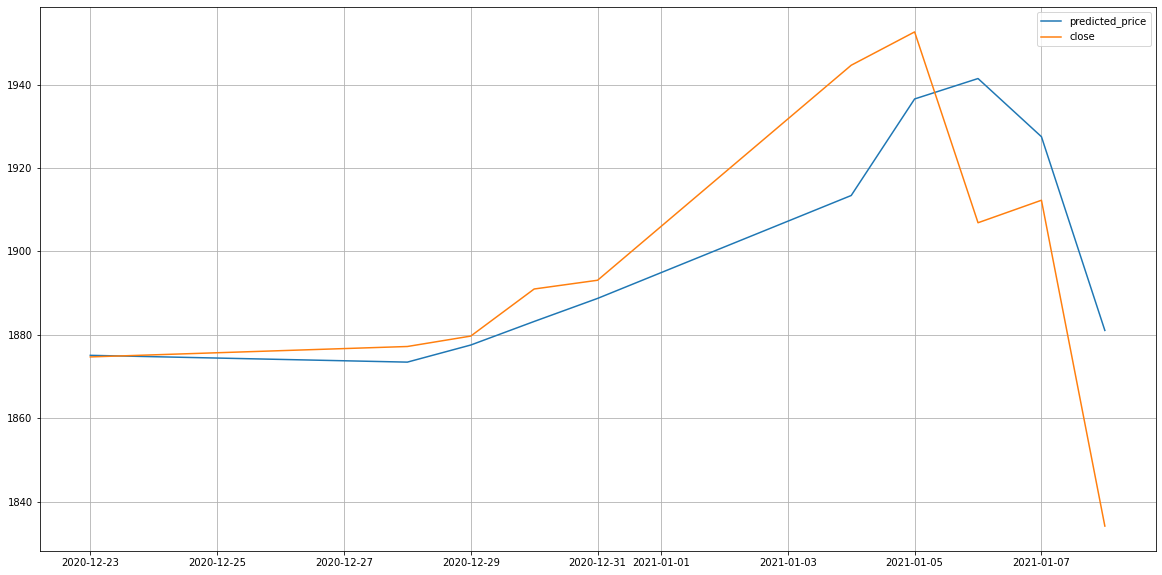

In [136]:
plt.plot(data.predicted_gold_price.tail(10))
plt.plot(data.Close.tail(10))
plt.legend(['predicted_price', 'close'])
plt.grid()
plt.show()